In [463]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import numpy as np
from MITgcmutils import jmd95

ModuleNotFoundError: No module named 'gsw'

In [736]:
#load mitgcm output where \kappa_{redi}=50 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_50'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2','layersDiags','dyn','gm']
ds50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds50, periodic=['X'], metrics=metrics)

In [9]:
#load mitgcm output where \kappa_{redi}=500 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_500'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [10]:
#load mitgcm output where \kappa_{redi}=5000 (modern)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/diffusion_5000'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [11]:
#load mitgcm output where \kappa_{redi}=50 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM50'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','layersDiags','dyn','tracer2','gm']
dsLGM50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM50, periodic=['X'])

In [12]:
#load mitgcm output where \kappa_{redi}=500 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM500'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']#
dsLGM500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM500, periodic=['X'])

In [134]:
#load mitgcm output where \kappa_{redi}=5000 (SUC)
datadir='/Users/boerzhang/Desktop/ocean_project/tracers_mod_LGM_jones/LGM5000'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']#
dsLGM5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid2 = xgcm.Grid(dsLGM5000, periodic=['X'])

In [135]:
#Find the mean depth of isopycnals in each basin (modern)
layers_depth_pac1 = (grid.cumsum((ds50.LaHs1RHO*ds50.dxG).mean('time').where(ds50.XC<140).sum('XC')/ds50.dxG.where(ds50.XC<140).sum('XC'), '1RHO',         
                                    boundary='fill').load())
layers_depth_atl1=(grid.cumsum((ds50.LaHs1RHO*ds50.dxG).mean('time').where(ds50.XC>140).sum('XC')/ds50.dxG.where(ds50.XC>140).sum('XC'), '1RHO', 
                                  boundary='fill').load())
layers_depth1=grid.cumsum(ds50.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix1=xr.concat([layers_depth1[:,0:36], layers_depth_atl1[:,36:144]],'YG')
layers_depth_pacmix1=xr.concat([layers_depth1[:,0:36], layers_depth_pac1[:,36:144]],'YG')


In [732]:
ds50.coords

Coordinates:
    iter                  (time) int64 54150000
  * time                  (time) timedelta64[ns] 626 days 17:40:00
  * XC                    (XC) >f4 0.4861 1.458 2.431 ... 207.6 208.5 209.5
  * YC                    (YC) >f4 -69.51 -68.54 -67.57 ... 67.57 68.54 69.51
  * XG                    (XG) >f4 0.0 0.9722 1.944 2.917 ... 207.1 208.1 209.0
  * YG                    (YG) >f4 -70.0 -69.03 -68.06 ... 67.08 68.05 69.02
  * Z                     (Z) >f4 -6.797 -21.38 -38.1 ... -3.572e+03 -3.857e+03
  * Zp1                   (Zp1) >f4 0.0 -13.59 -29.17 ... -3.714e+03 -4e+03
  * Zu                    (Zu) >f4 -13.59 -29.17 -47.02 ... -3.714e+03 -4e+03
  * Zl                    (Zl) >f4 0.0 -13.59 -29.17 ... -3.431e+03 -3.714e+03
    rA                    (YC, XC) >f4 4.089e+09 4.089e+09 ... 4.089e+09
    dxG                   (YG, XC) >f4 dask.array<chunksize=(144, 216), meta=np.ndarray>
    dyG                   (YC, XG) >f4 dask.array<chunksize=(144, 216), meta=np.ndarra

In [137]:
print((ds50.LaHs1RHO*ds50.dxG).mean('time').where(ds50.XC<140).sum('XC').load())

<xarray.DataArray (layer_1RHO_center: 36, YG: 144)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 2.2981926e+08, 4.1819066e+08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.8794461e+10, 2.0299670e+10, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.5223898e+09, 1.0857708e+09, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
  * YG                 (YG) >f4 -70.0 -69.03 -68.06 -67.08 ... 67.08 68.05 69.02
  * layer_1RHO_center  (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47


In [138]:
layers_depth_pacmix1=layers_depth_pacmix1.where(np.isfinite(layers_depth_pacmix1),0)
layers_depth_atlmix1=layers_depth_atlmix1.where(np.isfinite(layers_depth_atlmix1),0)

In [139]:
#Find the mean depth of isopycnals in each basin (SUC)
layers_depth_pac2 = (grid2.cumsum((dsLGM50.LaHs1RHO*dsLGM50.dxG).mean('time').where(dsLGM50.XC<140).sum('XC')/
                                  dsLGM50.dxG.where(dsLGM50.XC<140).sum('XC'), '1RHO', boundary='fill').load())
layers_depth_atl2=(grid2.cumsum((dsLGM50.LaHs1RHO*dsLGM50.dxG).mean('time').where(dsLGM50.XC>140).sum('XC')/
                                dsLGM50.dxG.where(dsLGM50.XC>140).sum('XC'), '1RHO', boundary='fill').load())
layers_depth2=grid2.cumsum(dsLGM50.LaHs1RHO.mean('time').mean('XC'), '1RHO', boundary='fill').load()
layers_depth_atlmix2=xr.concat([layers_depth2[:,0:36], layers_depth_atl2[:,36:144]],'YG')
layers_depth_pacmix2=xr.concat([layers_depth2[:,0:36], layers_depth_pac2[:,36:144]],'YG')
layers_depth_pacmix2=layers_depth_pacmix2.where(np.isfinite(layers_depth_pacmix2),0)
layers_depth_atlmix2=layers_depth_atlmix2.where(np.isfinite(layers_depth_atlmix2),0)

In [141]:
#Find the ROC
ROC_pac1=grid.cumsum((ds50.LaVH1RHO[:,:,:,0:139]*ds50.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl1=grid.cumsum((ds50.LaVH1RHO[:,:,:,140:215]*ds50.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot1=grid.cumsum((ds50.LaVH1RHO*ds50.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_pac2=grid2.cumsum((dsLGM50.LaVH1RHO[:,:,:,0:139]*dsLGM50.dxG[:,0:139]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_atl2=grid2.cumsum((dsLGM50.LaVH1RHO[:,:,:,140:215]*dsLGM50.dxG[:,140:215]).mean('time').sum('XC'),'1RHO',boundary='fill').load()
ROC_tot2=grid2.cumsum((dsLGM50.LaVH1RHO*dsLGM50.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()

In [224]:
#Eulerian overturning
#modern
OT_tot=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')

gm_tot=(ds50.GM_PsiY*ds50.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
print(OT_tot)
print(gm_tot)

Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()

<xarray.DataArray (Zp1: 33, YG: 144)>
dask.array<transpose, shape=(33, 144), dtype=float32, chunksize=(33, 144), chunktype=numpy.ndarray>
Coordinates:
  * YG       (YG) >f4 -70.0 -69.03 -68.06 -67.08 ... 66.11 67.08 68.05 69.02
  * Zp1      (Zp1) >f4 0.0 -13.59 -29.17 -47.02 ... -3.431e+03 -3.714e+03 -4e+03
<xarray.DataArray (Zp1: 32, YG: 144)>
dask.array<sum-aggregate, shape=(32, 144), dtype=float32, chunksize=(32, 144), chunktype=numpy.ndarray>
Coordinates:
    iter     int64 54150000
    time     timedelta64[ns] 626 days 17:40:00
  * YG       (YG) >f4 -70.0 -69.03 -68.06 -67.08 ... 66.11 67.08 68.05 69.02
  * Zp1      (Zp1) >f4 0.0 -13.59 -29.17 ... -3.153e+03 -3.431e+03 -3.714e+03


In [941]:
#Eulerian overturning
#modern
OT_atl=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac=grid.cumsum((ds50.VVEL*ds50.drF*ds50.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl=(ds50.GM_PsiY*ds50.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot=(ds50.GM_PsiY*ds50.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac=(ds50.GM_PsiY*ds50.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl=OT_atl.load()
Eul_atl[0:-1,:]=(OT_atl[0:-1,:]+gm_atl).rolling(YG=2).mean().load()
Eul_tot=OT_tot.load()
Eul_tot[0:-1,:]=(OT_tot[0:-1,:]+gm_tot).rolling(YG=2).mean().load()
Eul_pac=OT_pac.load()
Eul_pac[0:-1,:]=(OT_pac[0:-1,:]+gm_pac).rolling(YG=2).mean().load()
Eul_atl[:,0:35]=Eul_tot[:,0:35].load()
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()

#SUC
OT_atl_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,140:].sum('XC'),'Z',boundary='extend',to='outer')
OT_tot_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,:].sum('XC'),'Z',boundary='extend',to='outer')
OT_pac_LGM=grid.cumsum((dsLGM50.VVEL*dsLGM50.drF*dsLGM50.dxG)[0,:,:,0:139].sum('XC'),'Z',boundary='extend',to='outer')
gm_atl_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,140:].sum('XC').rename({'Zl':'Zp1'})
gm_tot_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,:].sum('XC').rename({'Zl':'Zp1'})
gm_pac_LGM=(dsLGM50.GM_PsiY*dsLGM50.dxG)[0,:,:,0:139].sum('XC').rename({'Zl':'Zp1'})
Eul_atl_LGM=OT_atl_LGM.load()
Eul_atl_LGM[0:-1,:]=(OT_atl_LGM[0:-1,:]+gm_atl_LGM).rolling(YG=2).mean().load()
Eul_tot_LGM=OT_tot_LGM.load()
Eul_tot_LGM[0:-1,:]=(OT_tot_LGM[0:-1,:]+gm_tot_LGM).rolling(YG=2).mean().load()
Eul_pac_LGM=OT_pac_LGM.load()
Eul_pac_LGM[0:-1,:]=(OT_pac_LGM[0:-1,:]+gm_pac_LGM).rolling(YG=2).mean().load()
Eul_atl_LGM[:,0:35]=Eul_tot_LGM[:,0:35].load()
Eul_pac_LGM[:,0:35]=Eul_tot_LGM[:,0:35].load()

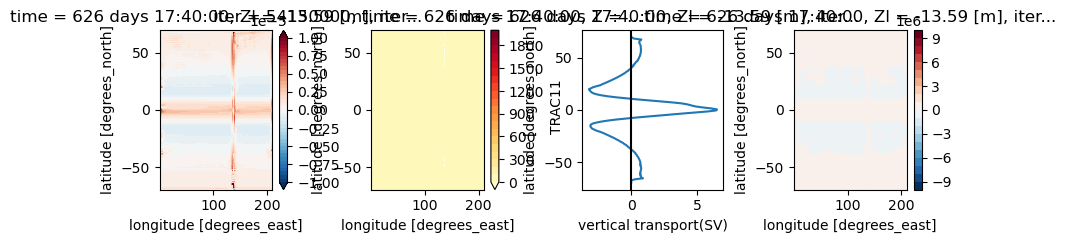

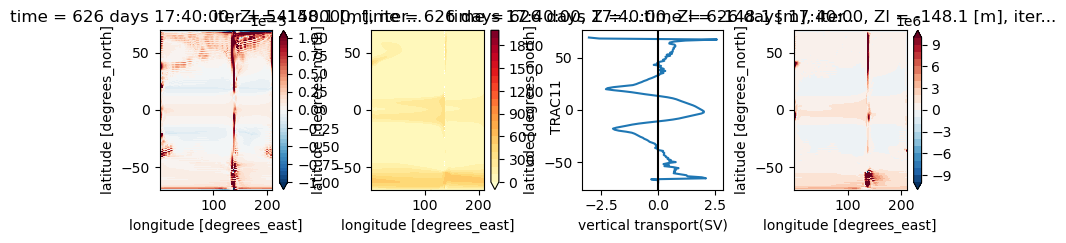

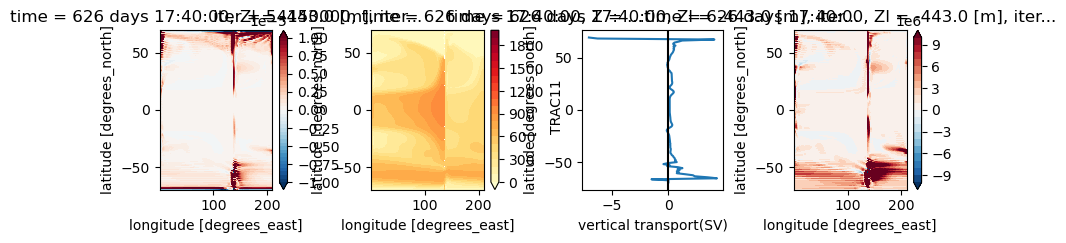

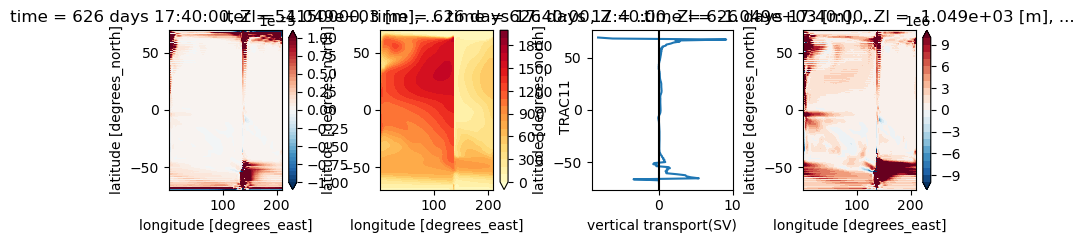

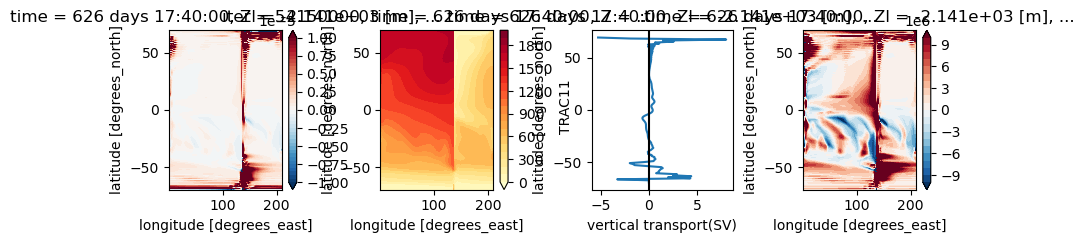

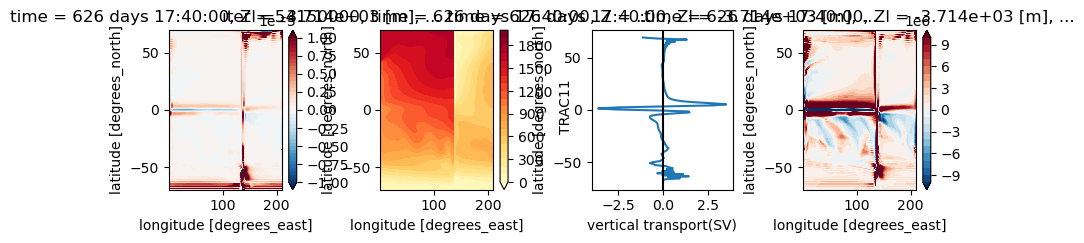

In [919]:
#plot tot velocity and age on z surfaces
#print(ds50.GM_PsiY)
#print(ds50.GM_PsiX)
#wgm= partial PsiX/partial x+partial PsiY/partial y
ppx_px=0#grid.diff(ds50.GM_PsiX, 'X',boundary='fill')/grid.interp(ds50.dxG,'Y')
ppy_py=grid.diff(ds50.GM_PsiY, 'Y',boundary='extend')/grid.interp(ds50.dyG,'X',boundary='periodic')
wgm=ppx_px+ppy_py

wstar=wgm+ds50.WVEL
wtransz=wstar*ds50.rA
ageflux=wtransz*grid.interp(ds500.TRAC11, axis='Z')/31104000
#wtransz=ds50.WVEL*ds50.rA
#print(wstar.mean("time"))

for i in range(0,6):
    fig = plt.figure(figsize=(10,30))
    plt.subplot(10, 4, i*4+1)
    wstar[0,i*6+1,:,:].where(wstar[0,i*6+1,:,:]!=0).plot.contourf(levels=np.arange(-1e-5,1e-5,0.5e-6))
    plt.subplot(10, 4, i*4+2)
    #ds50.WVEL[0,28,:,:].where(ds50.WVEL[0,28,:,:]!=0).plot.contourf(levels=np.arange(-1e-5,1e-5,0.5e-6))
    (ds500.TRAC11[0,i*6+1,:,:]/31104000).where(ds50.SALT[0,i*6+1,:,:]!=0).plot.contourf(levels=np.arange(0,2050,100),cmap=plt.cm.YlOrRd)
    fig.subplots_adjust(wspace=0.5,hspace=0.5)  
    plt.subplot(10,4,i*4+3)
    (wtransz[0,i*6+1,:,:]/1e6).rolling(YC=4).mean().sum("XC").plot(y='YC')
    plt.xlabel('vertical transport(SV)')
    plt.axvline(color='k')
    plt.subplot(10,4,i*4+4)
    ageflux[0,i*6+1,:,:].where(wstar[0,i*6+1,:,:]!=0).plot.contourf(levels=np.arange(-1e7,1.01e7,0.1e7))
    #print(sum((wtransz[0,i*6+1,:,:]/1e6).sum("XC").load()))
#fig.savefig('velocity_age_z.pdf', bbox_inches='tight')
 

In [926]:
print(grid.interp(ds50.dyG,'X',boundary='periodic').load())

<xarray.DataArray 'dyG' (YC: 144, XC: 216)>
array([[108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74],
       [108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74],
       [108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74],
       ...,
       [108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74],
       [108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74],
       [108086.74, 108086.74, 108086.74, ..., 108086.74, 108086.74,
        108086.74]], dtype=float32)
Coordinates:
  * XC       (XC) >f4 0.4861 1.458 2.431 3.403 4.375 ... 206.6 207.6 208.5 209.5
  * YC       (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 66.59 67.57 68.54 69.51


<xarray.DataArray (Zl: 32)>
array([ 0.0000000e+00, -4.2173269e-09, -3.8382950e-09,  1.4871148e-08,
        4.5359229e-08,  8.5263764e-08, -1.5813930e-07,  1.4689158e-07,
       -7.3371666e-08, -1.9004801e-08,  1.9708386e-07, -5.8766454e-07,
       -3.3994002e-07, -7.9988240e-08,  4.3503496e-07,  5.7666330e-07,
        5.0288509e-07,  5.4040356e-08,  3.5386620e-08, -5.6860154e-07,
        3.1888703e-08, -8.4062594e-07,  2.6784983e-07, -5.4966222e-07,
        1.3314275e-07,  4.6462083e-07, -3.8772123e-07, -1.1858356e-07,
        1.4694524e-07,  1.5879050e-07, -1.4992838e-07, -9.0149115e-09],
      dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -13.59 -29.17 ... -3.153e+03 -3.431e+03 -3.714e+03


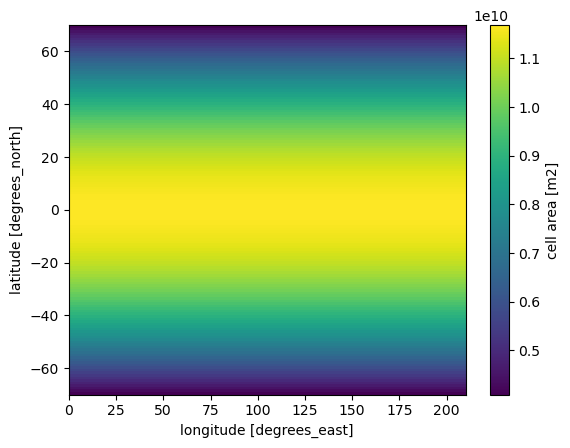

In [938]:
#print(ds50.rA)
ppx_px=grid.diff(ds50.GM_PsiX, 'X',boundary='periodic')/grid.interp(ds50.dxG,'Y')
ppy_py=0#0grid.diff(ds50.GM_PsiY, 'Y',boundary='periodic')/grid.interp(ds50.dyG,'X',boundary='fill')
wgm=ppx_px+ppy_py
ds50.rA.plot()
#(wgm*ds50.rA/1e6).sum('XC').sum('YC').mean('time').load()
print((wgm*ds50.rA/1e6).sum('XC').sum('YC').mean('time').load())
#ds50.GM_PsiY.mean('time').sum('XC').plot()

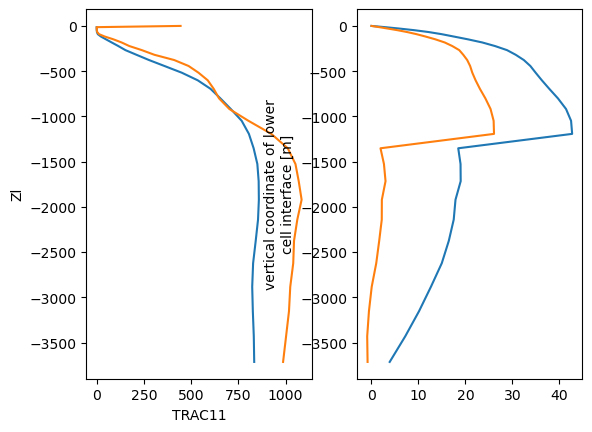

In [902]:
ageflux=wtransz*grid.interp(ds500.TRAC11, axis='Z')/31104000
age_z=grid.interp(ds500.TRAC11, axis='Z')/31104000
wtransz_zonal=wtransz.mean('XC').rolling(YC=4).mean()
upwellmask=wtransz_zonal>0
downwellmask=wtransz_zonal<=0

age_z_up=grid.average(age_z.where(upwellmask),['X','Y']).mean('time').load()
age_z_down=grid.average(age_z.where(downwellmask),['X','Y']).mean('time').load()
wtransz_up=(wtransz.where(upwellmask)).sum('XC').sum('YC').mean('time')
wtransz_down=(wtransz.where(downwellmask)).sum('XC').sum('YC').mean('time')
ageflux_up=(ageflux.where(upwellmask)).sum('XC').sum('YC').mean('time')
ageflux_down=(ageflux.where(downwellmask)).sum('XC').sum('YC').mean('time')
Minfer=ageflux.sum('XC').sum('YC').mean('time')/(age_z_up-age_z_down)
#(Minfer/1e6).plot(y='Zl')
#(wtransz_up/1e6).plot(y='Zl')
#wtransz_down=
#print(wtransz_up.load())
#print(age_z_up,age_z_down)
fig = plt.figure()
plt.subplot(1, 2, 1)
age_z_up.plot(y='Zl')
age_z_down.plot(y='Zl')
plt.subplot(1, 2, 2)
(wtransz_up/1e6).plot(y='Zl')
(-wtransz_down/1e6).plot(y='Zl')

In [894]:
#print(grid.interp((Eul_tot/1e6),axis="Y"))
Yindex=xr.ones_like(ds50.YC)
Yindex=Yindex.cumsum("YC")
upwellmask=(Yindex<grid.interp((Eul_tot/1e6),axis="Y").argmax("YC"))
downwellmask=(Yindex<grid.interp((Eul_tot/1e6),axis="Y").argmax("YC"))

<xarray.DataArray (YC: 144)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True

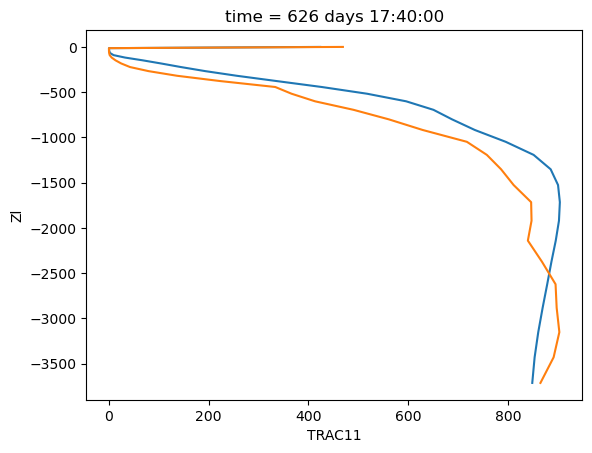

In [865]:
##define zones by maximum streanfunc(Zspace)
ageflux=wtransz*grid.interp(ds500.TRAC11, axis='Z')/31104000
age_z=grid.interp(ds500.TRAC11, axis='Z')/31104000
wtransz_zonal=wtransz.mean('XC').mean('time').rolling(YC=4).mean()
upwellmask=ds50.YC<45
downwellmask=wtransz_zonal<0

age_z_up=grid.average(age_z.where(upwellmask),['X','Y']).load()
age_z_down=grid.average(age_z.where(downwellmask),['X','Y']).load()
wtransz_up=(wtransz.where(upwellmask)).sum('XC').sum('YC')
wtransz_down=(wtransz.where(downwellmask)).sum('XC').sum('YC')
ageflux_up=(ageflux.where(upwellmask)).sum('XC').sum('YC')
ageflux_down=(ageflux.where(downwellmask)).sum('XC').sum('YC')
Minfer=ageflux.sum('XC').sum('YC')/(age_z_up-age_z_down)


#(Minfer/1e6).plot(y='Zl')
#(wtransz_up/1e6).plot(y='Zl')
#wtransz_down=
#print(wtransz_up.load())
#print(age_z_up,age_z_down)
age_z_up.plot(y='Zl')
age_z_down.plot(y='Zl')

<xarray.DataArray 'TRAC11' ()>
array(910.46605966)
Coordinates:
    iter     int64 54150000
    time     timedelta64[ns] 626 days 17:40:00
    Z        >f4 -3.857e+03
    drF      >f4 286.1
    PHrefC   >f4 3.784e+04
    rhoRef   >f4 1.035e+03
    Zl       >f4 -1.193e+03
<xarray.DataArray ()>
array(910.46544293)
Coordinates:
    iter     int64 54150000
    time     timedelta64[ns] 626 days 17:40:00
    Z        >f4 -3.857e+03
    drF      >f4 286.1
    PHrefC   >f4 3.784e+04
    rhoRef   >f4 1.035e+03
    Zl       >f4 -1.193e+03


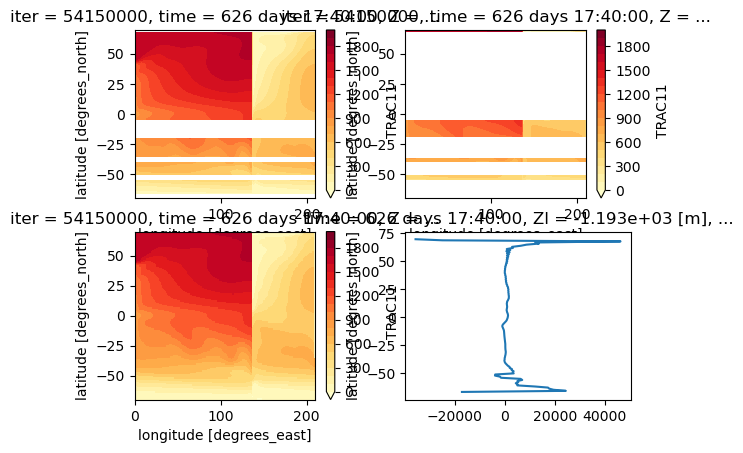

In [790]:
wstar=wgm+ds50.WVEL
wtransz=wstar*ds50.rA
wtransz=wtransz.rolling(YC=4).mean()
#wtransz=ds50.WVEL*ds50.rA
ilevel=20
agelevel=(ds500.TRAC11[0,i*6+1,:,:]/31104000)
wtrans_zonal=wtransz[0,ilevel,:,:].mean('XC')

#print(wtransz[0,ilevel,:,:].mean('XC'))
#print("\n",agelevel.where(wtrans_zonal>0))
#print("\n",grid._metrics)
plt.subplot(2,2,1)
agelevel.where(wtrans_zonal>0).plot.contourf(levels=np.arange(0,2050,100),cmap=plt.cm.YlOrRd)
plt.subplot(2,2,2)
agelevel.where(wtrans_zonal<0).plot.contourf(levels=np.arange(0,2050,100),cmap=plt.cm.YlOrRd)
plt.subplot(2,2,3)
#agelevel.plot.contourf(levels=np.arange(0,2050,100),cmap=plt.cm.YlOrRd)
agelevel.plot(levels=np.arange(0,2050,100),cmap=plt.cm.YlOrRd)
plt.subplot(2,2,4)
wtrans_zonal.plot(y="YC")
#print((wtrans_zonal>0).load())
#print(agelevel.where(wtrans_zonal>0).load())
#print(grid.average(agelevel.where(wtrans_zonal>0),['X','Y']).load())
#print(grid.average(agelevel.where(wtrans_zonal<0),['X','Y']).load())
#print(((agelevel*ds50.rA).where(wtrans_zonal>0).sum('XC').sum('YC')/ds50.rA.where(wtrans_zonal>0).sum('XC').sum('YC')).load())


In [443]:
##need to check Lamask! Oct9 2022
#print(ds50.LaUH1RHO)
#print(grid.interp(ds50.LaHs1RHO,'X'))
Lamask=grid.interp(ds50.LaHs1RHO,'Y')+grid.interp(ds50.LaHw1RHO,'X')
print(Lamask)

<xarray.DataArray (time: 1, layer_1RHO_center: 36, YC: 144, XC: 216)>
dask.array<add, shape=(1, 36, 144, 216), dtype=float32, chunksize=(1, 36, 144, 216), chunktype=numpy.ndarray>
Coordinates:
  * time               (time) timedelta64[ns] 626 days 17:40:00
  * XC                 (XC) >f4 0.4861 1.458 2.431 3.403 ... 207.6 208.5 209.5
  * YC                 (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 67.57 68.54 69.51
  * layer_1RHO_center  (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47


In [631]:
rho=lineareos(ds50.SALT,ds50.THETA)
tracer_500 = layers_apply(ds500.TRAC11.mean('time'),rho.mean('time'), ds50.layer_1RHO_bounds[:-1].values, ds50.drF, ds50.drC, 10, 'Z', 'layer_1RHO_center')
zeta_500 = layers_apply(xr.ones_like(ds500.TRAC11.mean('time')), rho.mean('time'), ds50.layer_1RHO_bounds[:-1].values, ds50.drF, ds50.drC, 10, 'Z', 'layer_1RHO_center')

age_den_500=tracer_500/zeta_500
#age_den_500[]
#age_dens1_500=grid.transform(ds500.TRAC11,'Z',rho,method='conservative',target_data=ds50.layer_1RHO_bounds)


print(age_den_500,vtrans)

<xarray.DataArray (YC: 144, XC: 216, layer_1RHO_center: 36)>
dask.array<truediv, shape=(144, 216, 36), dtype=float64, chunksize=(144, 216, 36), chunktype=numpy.ndarray>
Coordinates:
  * XC                 (XC) >f4 0.4861 1.458 2.431 3.403 ... 207.6 208.5 209.5
  * YC                 (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 67.57 68.54 69.51
    rA                 (YC, XC) >f4 4.089e+09 4.089e+09 ... 4.089e+09 4.089e+09
    Depth              (YC, XC) >f4 4e+03 4e+03 4e+03 4e+03 ... 0.0 0.0 0.0 0.0
  * layer_1RHO_center  (layer_1RHO_center) >f4 28.0 29.0 29.5 ... 34.4 34.45 <xarray.DataArray (time: 1, layer_1RHO_bounds: 37, YC: 144, XC: 216)>
dask.array<add, shape=(1, 37, 144, 216), dtype=float32, chunksize=(1, 37, 144, 216), chunktype=numpy.ndarray>
Coordinates:
  * time               (time) timedelta64[ns] 626 days 17:40:00
  * XC                 (XC) >f4 0.4861 1.458 2.431 3.403 ... 207.6 208.5 209.5
  * YC                 (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 67.57 68.54 69.51
  * 

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


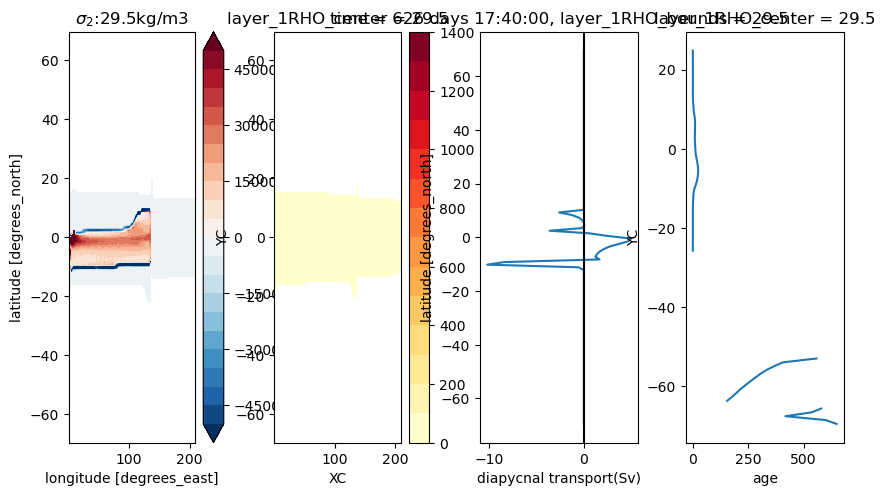

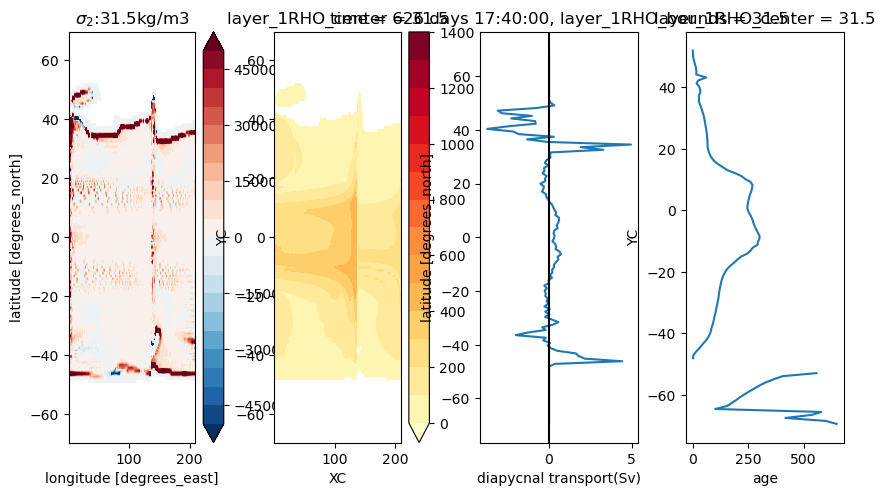

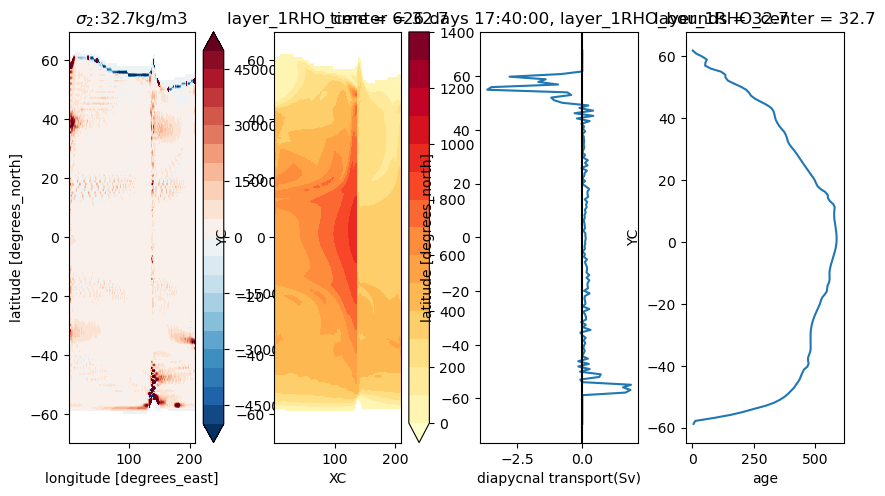

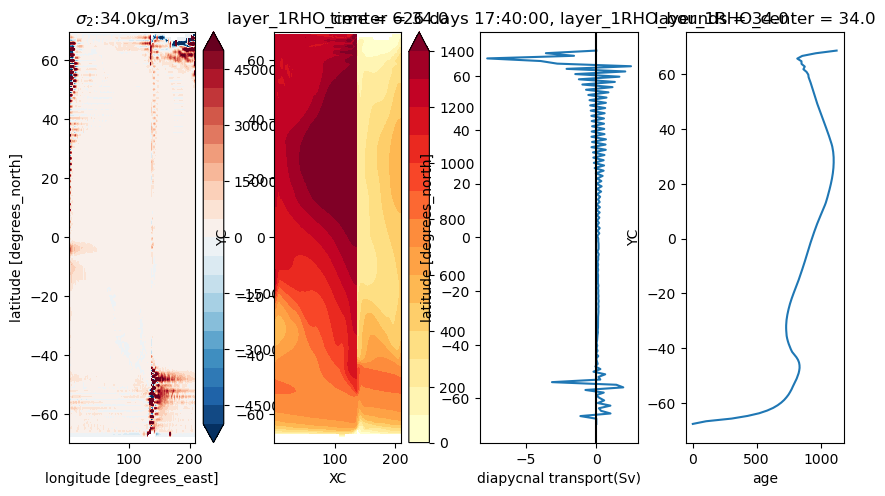

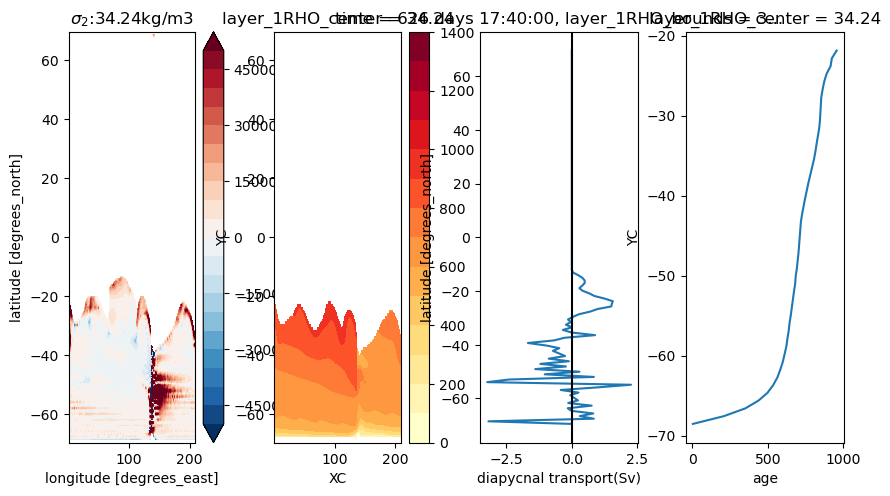

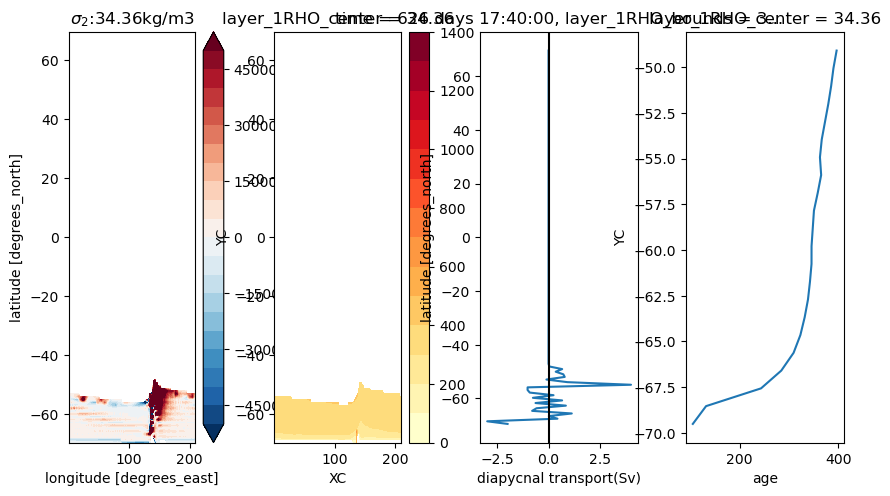

In [713]:
#vtrans = (grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='fill') + 
#             grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
vtrans = ( grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='periodic') + 
            grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
#print(vtrans)
for i in range(0,6):
    ilevel=6*i+2
    fig = plt.figure(figsize=(10,40))
    plt.subplot(6,4,i*4+1)
    vtrans[0,ilevel,:,:].where(Lamask[0,ilevel,:,:]!=0).plot.contourf(levels=np.arange(-5e4,5.2e4,0.5e4))#levels=np.arange(-1e-5,1e-5,0.5e-6)
    plt.title('$\sigma_2$:'+str(vtrans.layer_1RHO_bounds[ilevel].data)+'kg/m3')
    plt.subplot(6,4,i*4+2)
    (age_den_500[:,:,ilevel]/31104000).plot.contourf(levels=np.arange(0,1500,100),cmap=plt.cm.YlOrRd)#levels=np.arange(-1e-5,1e-5,0.5e-6)
    plt.subplot(6,4,i*4+3)
    (vtrans[0,ilevel,:,:]/1e6).sum('XC').plot(y="YC")
    plt.xlabel('diapycnal transport(Sv)')
    plt.axvline(color='k')
    plt.subplot(6,4,i*4+4)
    (age_den_500[:,:,ilevel]/31104000).mean('XC').plot(y="YC")
    plt.xlabel('age')
    fig.subplots_adjust(wspace=0.3,hspace=0.3)
    #print((vtrans/1e6).sum('XC').sum('YC').load())
    
    

<xarray.DataArray 'LaHs1RHO' (layer_1RHO_bounds: 37)>
array([0.0000000e+00, 1.0000000e+00, 4.6413240e+00, 2.3706591e+01,
       3.2389168e+01, 4.4669510e+01, 6.0152878e+01, 9.4760345e+01,
       1.4528757e+02, 1.7628966e+02, 2.0789825e+02, 2.3902512e+02,
       2.6991971e+02, 3.0232117e+02, 3.3661264e+02, 3.7506512e+02,
       4.1917462e+02, 4.7213580e+02, 5.4001849e+02, 6.3372693e+02,
       9.0891821e+02, 1.0665945e+03, 2.6468701e+03, 2.8745930e+03,
       3.0156592e+03, 3.1184846e+03, 3.1952568e+03, 3.3077888e+03,
       3.3891084e+03, 3.4501143e+03, 3.4983186e+03, 3.5419341e+03,
       3.5858318e+03, 3.6353640e+03, 3.6948628e+03, 3.8881362e+03,
       3.9144565e+03], dtype=float32)
Coordinates:
  * layer_1RHO_bounds  (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
<xarray.DataArray 'layer_1RHO_bounds' (layer_1RHO_bounds: 37)>
array([9.00000000e+00, 2.70000000e+01, 4.67653732e+01, 8.10000000e+01,
       1.12621429e+02, 1.56587814e+02, 2.17717819e+02, 3.02712860e+02,
       4.2

[Text(0, 9.0, '28.0'),
 Text(0, 81.0, '30.0'),
 Text(0, 217.71782, '30.9'),
 Text(0, 524.3141, '31.7'),
 Text(0, 1013.59283, '32.3'),
 Text(0, 1959.4645, '32.9'),
 Text(0, 3787.995, '33.5'),
 Text(0, 7322.872, '34.1'),
 Text(0, 8354.824, '34.22'),
 Text(0, 8730.131, '34.26'),
 Text(0, 9324.997, '34.32'),
 Text(0, 9960.396, '34.38'),
 Text(0, 11363.985, '34.5')]

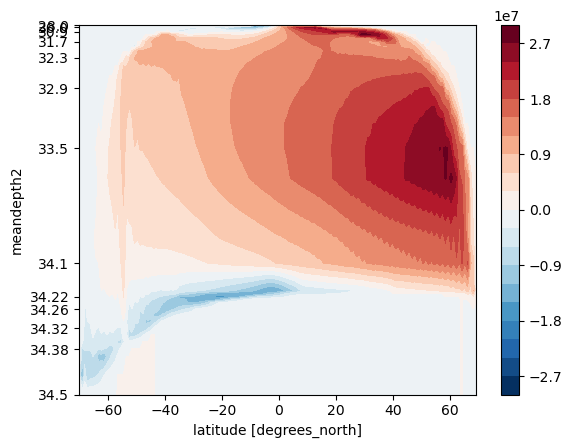

In [669]:
meandepth1=layers_depth1.mean("YG").load()
meandepth1[1:]=meandepth1[1:]+1
print(meandepth1)
meandepth2=3**(ROC_tot1.layer_1RHO_bounds-26)
print(meandepth2)
ROC_tot1plot=ROC_tot1.assign_coords(meandepth2=("layer_1RHO_bounds", meandepth2.data))

#ROC_tot1plot.plot.contourf(levels=np.arange(-3e7,3.3e7,3e6),y="meandepth1")
ROC_tot1plot.plot.contourf(levels=np.arange(-3e7,3.3e7,3e6),y="meandepth2")
plt.gca().invert_yaxis()
plt.gca().set_yticks(meandepth2.data[::3])
plt.gca().set_yticklabels(ROC_tot1.layer_1RHO_bounds.data[::3])

In [691]:
print((vtrans.rolling(YC=2).mean()).mean('time').sum('XC'))
print(vtrans.mean('time').sum('XC'))

<xarray.DataArray (layer_1RHO_bounds: 37, YC: 144)>
dask.array<sum-aggregate, shape=(37, 144), dtype=float32, chunksize=(37, 144), chunktype=numpy.ndarray>
Coordinates:
  * YC                 (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 67.57 68.54 69.51
  * layer_1RHO_bounds  (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
    meandepth2         (layer_1RHO_bounds) float32 9.0 27.0 ... 1.136e+04
<xarray.DataArray (layer_1RHO_bounds: 37, YC: 144)>
dask.array<sum-aggregate, shape=(37, 144), dtype=float32, chunksize=(37, 144), chunktype=numpy.ndarray>
Coordinates:
  * YC                 (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 67.57 68.54 69.51
  * layer_1RHO_bounds  (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
    meandepth2         (layer_1RHO_bounds) float32 9.0 27.0 ... 1.136e+04


[Text(0, 9.0, '28.0'),
 Text(0, 81.0, '30.0'),
 Text(0, 217.71782, '30.9'),
 Text(0, 524.3141, '31.7'),
 Text(0, 1013.59283, '32.3'),
 Text(0, 1959.4645, '32.9'),
 Text(0, 3787.995, '33.5'),
 Text(0, 7322.872, '34.1'),
 Text(0, 8354.824, '34.22'),
 Text(0, 8730.131, '34.26'),
 Text(0, 9324.997, '34.32'),
 Text(0, 9960.396, '34.38'),
 Text(0, 11363.985, '34.5')]

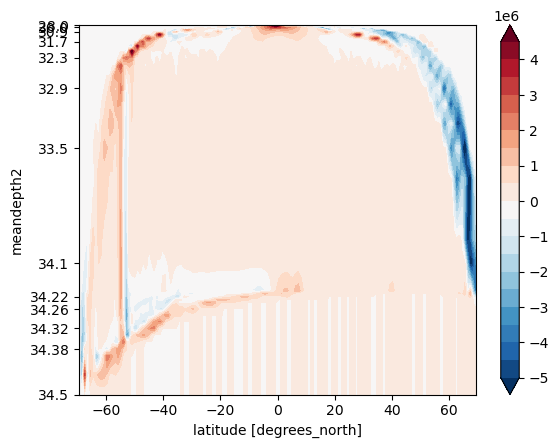

In [698]:
vtrans=grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='periodic')+grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill')
vtrans=vtrans.assign_coords(meandepth2=("layer_1RHO_bounds", meandepth2.data))

#fig = plt.figure(figsize=(10,7))
vtrans.rolling(YC=2).mean().mean('time').sum('XC').plot.contourf(levels=np.arange(-5e6,5e6,0.5e6),y="meandepth2")
plt.gca().invert_yaxis()
#plt.gca().invert_yaxis()
plt.gca().set_yticks(meandepth2.data[::3])
plt.gca().set_yticklabels(ROC_tot1.layer_1RHO_bounds.data[::3])

In [ ]:
meandepth1=layers_depth1.mean("YG").load()
meandepth1[1:]=meandepth1[1:]+1
print(meandepth1)
meandepth2=3**(ROC_tot1.layer_1RHO_bounds-26)
print(meandepth2)
ROC_tot1plot=ROC_tot1.assign_coords(meandepth2=("layer_1RHO_bounds", meandepth2.data))
print(ROC_tot1plot)
#ROC_tot1plot.plot.contourf(levels=np.arange(-3e7,3.3e7,3e6),y="meandepth1")
ROC_tot1plot.plot.contourf(levels=np.arange(-3e7,3.3e7,3e6),y="meandepth2")
plt.gca().invert_yaxis()
plt.gca().set_yticks(meandepth2.data[::3])
plt.gca().set_yticklabels(ROC_tot1.layer_1RHO_bounds.data[::3])

<xarray.DataArray 'TRAC11' (Z: 32, YC: 144)>
dask.array<truediv, shape=(32, 144), dtype=float64, chunksize=(32, 144), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 66.59 67.57 68.54 69.51
  * Z        (Z) >f4 -6.797 -21.38 -38.1 ... -3.292e+03 -3.572e+03 -3.857e+03
    iter     int64 54150000
    time     timedelta64[ns] 626 days 17:40:00
    drF      (Z) >f4 13.59 15.58 17.85 20.43 23.37 ... 269.9 277.8 283.3 286.1
    PHrefC   (Z) >f4 66.68 209.8 373.7 561.5 ... 3.229e+04 3.504e+04 3.784e+04
    rhoRef   (Z) >f4 1.035e+03 1.035e+03 1.035e+03 ... 1.035e+03 1.035e+03
<xarray.DataArray 'WVEL' (Zl: 32, YC: 144)>
dask.array<mean_agg-aggregate, shape=(32, 144), dtype=float32, chunksize=(32, 144), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 66.59 67.57 68.54 69.51
  * Zl       (Zl) >f4 0.0 -13.59 -29.17 ... -3.153e+03 -3.431e+03 -3.714e+03
    iter     int64 54150000
    time     timedelta64[ns] 626 

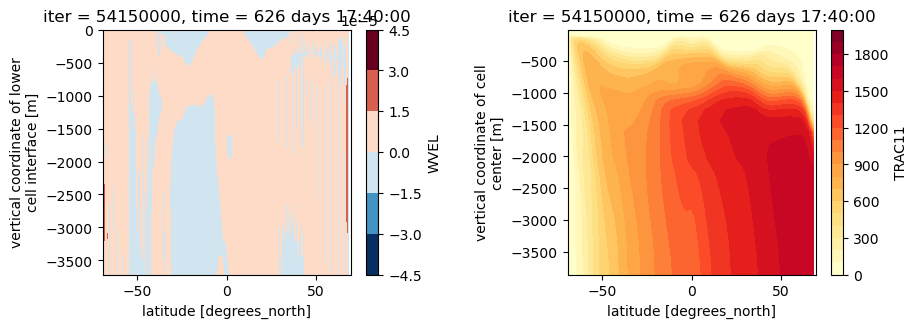

In [415]:
#wVel.plot.contourf(levels=np.arange(-0.5e-5,0.5e-5,0.01e-5))
age=ds500.TRAC11[0,:,:,:].where(ds50.maskC).mean('XC')/(31104000)
age_pac=ds500.TRAC11[0,:,:,0:139].where(ds50.maskC).mean('XC')/(31104000)

print(age_pac)
wVelmeanpac=ds50.WVEL[0,:,:,0:139].where(ds50.WVEL[0,:,:,:]!=0).mean('XC')
print(wVelmeanpac)
#wVelmean.plot.contourf()
#print(ds50.maskW)
print(wVelmeanpac[10,:])
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
wVelmean.plot.contourf()
plt.subplot(2, 2, 2)
age_pac.plot.contourf(levels=np.arange(0,2005,100),cmap=plt.cm.YlOrRd,extend='neither')
fig.subplots_adjust(wspace=0.5)

Text(0, 0.5, 'wvel')

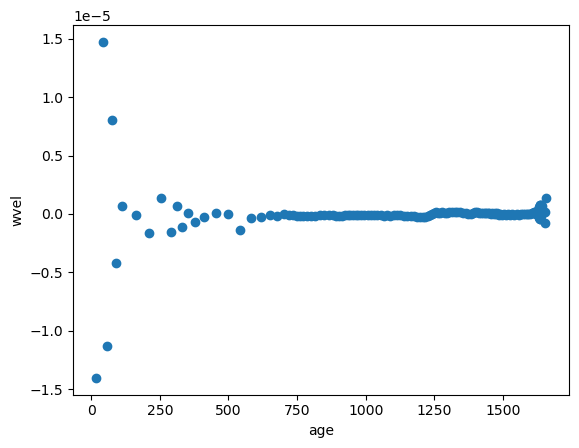

In [462]:


plt.scatter(age_pac[25,:],wVelmeanpac[25,:])
plt.xlabel('age')
plt.ylabel('wvel')


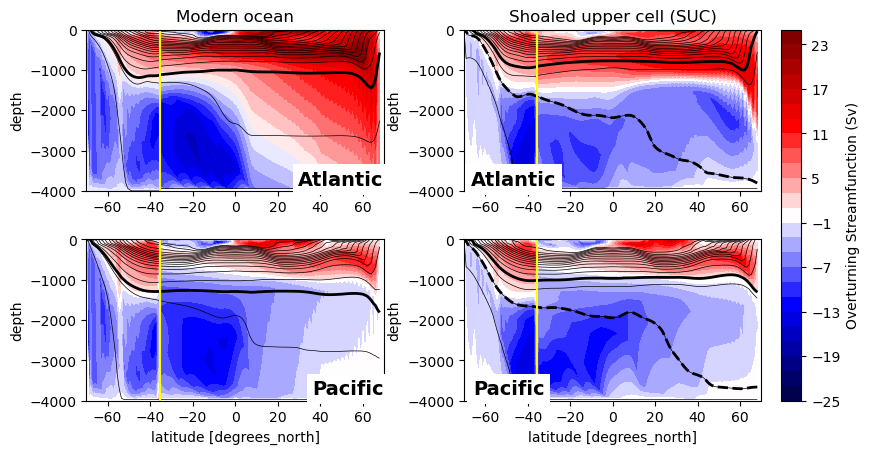

In [863]:
#Plot figure 2
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_tot1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
#layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0073,0.4,0.2),colors='black',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
im=(b[:,:-1]/10**6).plot.contourf(x='YG',y='depth',vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),cmap='seismic',add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)

layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Overturning Streamfunction (Sv)')
fig.savefig('ROC_modern_LGM.pdf', bbox_inches='tight')

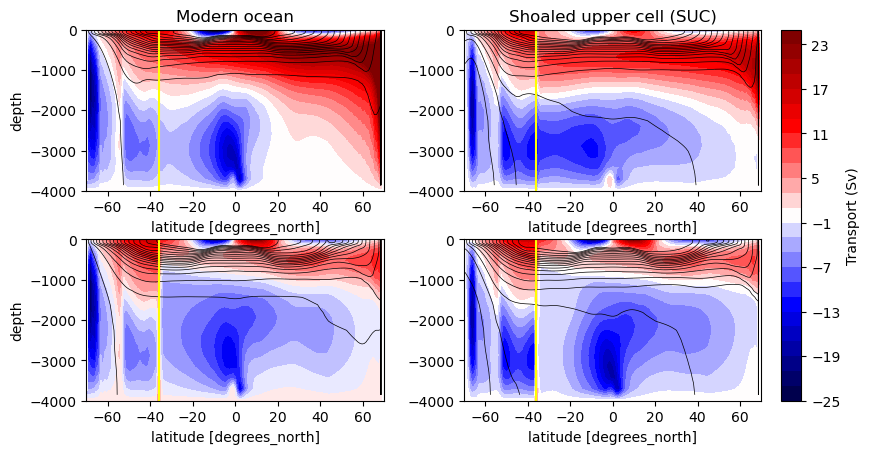

In [942]:
#Eulerian overturning (figure S1)
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))

(Eul_tot/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2), 
                              cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

ax = plt.gca()
ax.set_title('Modern ocean')
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')

plt.subplot(2, 2, 3)
(Eul_pac/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')

plt.subplot(2, 2, 2)
b=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))


(Eul_atl_LGM/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                             cmap='seismic',add_colorbar=False)
b[0,:,:,141:-1].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_title('Shoaled upper cell (SUC)')
ax.set_ylabel('')

plt.subplot(2, 2, 4)
im = (Eul_pac_LGM/10**6).plot.contourf(vmin=-25,vmax=25,xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),
                                cmap='seismic',add_colorbar=False)
b[0,:,:,:140].mean('XC').plot.contour(levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.set_ylabel('')
ax.set_title('')

fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
fig.savefig('overturning_depth.pdf', bbox_inches='tight')

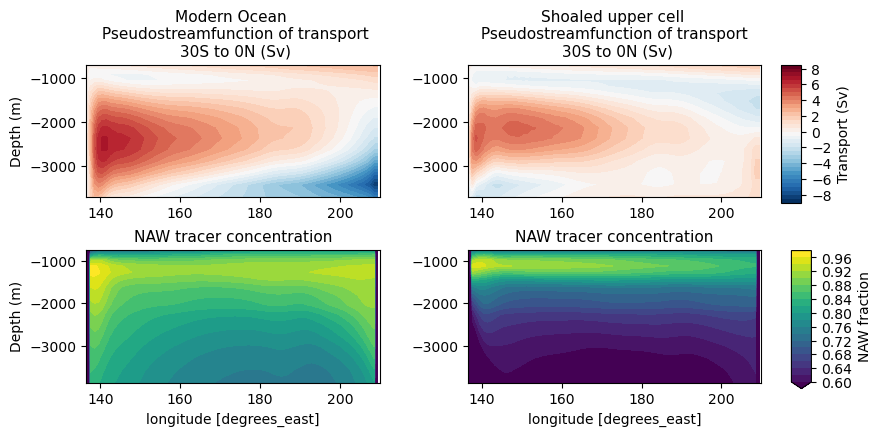

In [244]:
#Plot figure 6
fig, ax = plt.subplots(2,2,figsize=(10,6))
((ds50.WVEL[0,16:,41:72,137:]*ds50.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,0],levels=np.arange(-9,9,0.5),add_colorbar=False)
ax[0,0].set_xlim(136.5,210)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_title('Modern Ocean \n Pseudostreamfunction of transport\n 30S to 0N (Sv)', fontsize=11)
ds500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,0],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,0].set_title('NAW tracer concentration', fontsize=11)
ax[1,0].set_xlim(136.5,210)
ax[1,0].set_ylabel('Depth (m)')
im=((dsLGM50.WVEL[0,16:,41:72,137:]*ds500.rA[41:72,137:]).sum('YC').cumsum('XC')/10**6).plot.contourf(ax=ax[0,1],levels=np.arange(-9,9,0.5),add_colorbar=False)

ax[0,1].set_xlim(136.5,210)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_title('Shoaled upper cell \n Pseudostreamfunction of transport \n 30S to 0N (Sv)', fontsize=11)
im2=dsLGM500.TRAC01[0,16:,41:72,137:].mean('YC').plot.contourf(ax=ax[1,1],levels=np.arange(0.6,1,0.02),add_colorbar=False)
ax[1,1].set_xlim(136.5,210)
ax[1,1].set_title('NAW tracer concentration', fontsize=11)
ax[1,1].set_ylabel('')
fig.subplots_adjust(hspace=0.4, wspace=0.3,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.65, 0.02, 0.23])
fig.colorbar(im, cax=cbar_ax,label='Transport (Sv)')
cbar_ax = fig.add_axes([0.83, 0.34, 0.02, 0.23])
fig.colorbar(im2, cax=cbar_ax,label='NAW fraction')
fig.savefig('zonal_view.pdf', bbox_inches='tight')

/var/folders/95/kqnc1xrn05zcmk1f2dtc1ldc0000gp/T/ipykernel_13178/1077161449.py:72: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8)


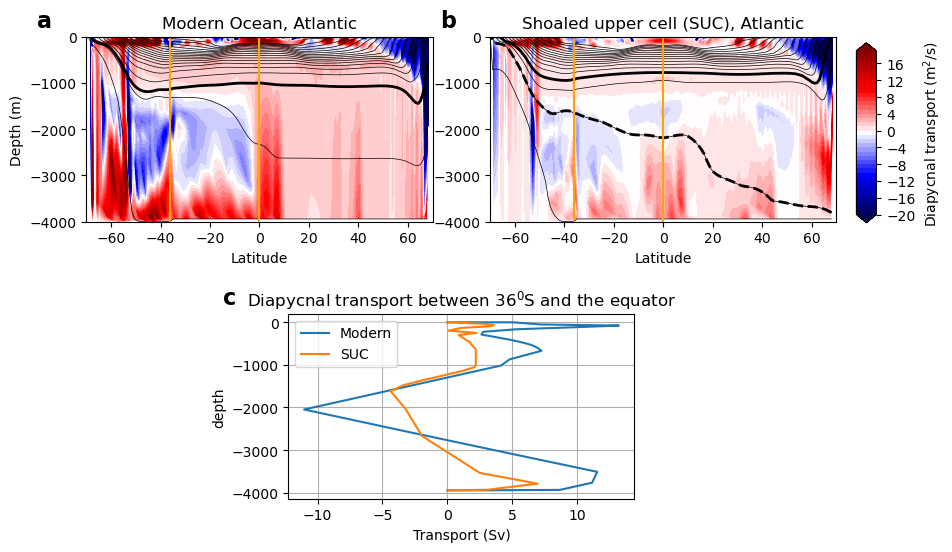

In [716]:
varpi = ((grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='periodic') + 
             grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
          / grid.interp(ds50.dyG,'X',boundary='fill'))[0,:,:,141:].sum('XC')


varpi = ((grid.diff(grid.cumsum(ds50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='periodic') + 
             grid.diff(grid.cumsum(ds50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
          / grid.interp(ds50.dyG,'X',boundary='fill'))[0,:,:,:].sum('XC')
varpiLGM = ((grid2.diff(grid2.cumsum(dsLGM50.LaUH1RHO,'1RHO',boundary='fill')*ds50.dyG, 'X',boundary='periodic') + 
             grid2.diff(grid2.cumsum(dsLGM50.LaVH1RHO,'1RHO',boundary='fill')*ds50.dxG, 'Y',boundary='fill'))
             /grid.interp(ds50.dyG,'X',boundary='fill'))[0,:,:,141:].sum('XC')
layer_depth = grid.interp(layers_depth_atlmix1,'Y', boundary='fill')
layer_depthLGM = grid2.interp(layers_depth_atlmix2,'Y', boundary='fill')


varpi.coords['depth']=-layer_depth
varpiLGM.coords['depth']=-layer_depthLGM

fig = plt.figure(figsize=(10,6),constrained_layout=True)
gs = fig.add_gridspec(2, 4,left=0.05, right=0.8, wspace=0.4,hspace=0.5)
f_ax1 = fig.add_subplot(gs[0, 0:2])
(varpi[:,:-1].rolling(YC=2).mean()).plot.contourf(x='YC',y='depth',ax=f_ax1,vmin=-20,vmax=20,
                             xlim=(-70,70),ylim=(-4000,0),cmap='seismic',levels=np.arange(-1,1,0.05)*20
                                                 , add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.0085,0.4,0.2),colors='black',linewidths=2)
plt.title('Modern Ocean, Atlantic')
plt.ylabel('Depth (m)')
plt.xlabel('Latitude')
f_ax1.axvline(-36,color='orange')
f_ax1.axvline(0,color='orange')
f_ax1.text(-0.1, 1.15, 'a', transform=f_ax1.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

f_ax2 = fig.add_subplot(gs[0, 2:])
im = (varpiLGM[:,:-1].rolling(YC=2).mean()).plot.contourf(x='YC',y='depth',ax=f_ax2,vmin=-20,vmax=20,
                             xlim=(-70,70),ylim=(-4000,0),cmap='seismic',levels=np.arange(-1,1,0.05)*20
                                                         , add_colorbar=False)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.014,0.4,0.2),colors='black',linewidths=2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0.01,0.4,0.2),colors='black',
                            linestyles='dashed',linewidths=2)
plt.title('Shoaled upper cell (SUC), Atlantic')
plt.ylabel('')
plt.xlabel('Latitude')
f_ax2.axvline(-36,color='orange')
f_ax2.axvline(0,color='orange')

f_ax2.text(-0.1, 1.15, 'b', transform=f_ax2.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

f_ax3 = fig.add_subplot(gs[1:, 1:3])
vertical_transport = (varpi*grid.interp(ds50.dyG,'X',boundary='fill')[:,141:].mean('XC')).sel(YC=slice(-36,0)).sum('YC')
vertical_transport['depth'] = -layer_depth.sel(YC=slice(-36,0)).mean('YC')
vertical_transportLGM = (varpiLGM*grid2.interp(ds50.dyG,'X',boundary='fill')[:,141:].mean('XC')).sel(YC=slice(-36,0)).sum('YC')
vertical_transportLGM['depth'] = -layer_depthLGM.sel(YC=slice(-36,0)).mean('YC')

(vertical_transport/10**6).plot(y='depth',ax=f_ax3)
(vertical_transportLGM/10**6).plot(y='depth',ax=f_ax3)
plt.legend(['Modern',"SUC"])
plt.grid()
plt.title('Diapycnal transport between 36$^0$S and the equator')
plt.xlabel('Transport (Sv)')

f_ax3.text(-0.15, 1.15, 'c', transform=f_ax3.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.57, 0.02, 0.3])
fig.colorbar(im, cax=cbar_ax,label='Diapycnal transport (m$^2$/s)')
fig.savefig('Vertical_transport.pdf', bbox_inches='tight')

In [628]:
def lineareos(s,t):
    rhoNil=1035
    rhoConst=1000
    dRho=rhoNil-rhoConst
    sBeta=7.4*10**-4
    tAlpha=2*10**-4
    s0=35
    t0=0
    return rhoNil*(sBeta*(s-s0)-tAlpha*(t-t0))+dRho  

print(lineareos(36,15))
print(ds50.layer_1RHO_bounds)

32.6609
<xarray.DataArray 'layer_1RHO_bounds' (layer_1RHO_bounds: 37)>
array([28.  , 29.  , 29.5 , 30.  , 30.3 , 30.6 , 30.9 , 31.2 , 31.5 , 31.7 ,
       31.9 , 32.1 , 32.3 , 32.5 , 32.7 , 32.9 , 33.1 , 33.3 , 33.5 , 33.7 ,
       34.  , 34.1 , 34.2 , 34.21, 34.22, 34.23, 34.24, 34.26, 34.28, 34.3 ,
       34.32, 34.34, 34.36, 34.38, 34.4 , 34.45, 34.5 ], dtype=float32)
Coordinates:
  * layer_1RHO_bounds  (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
Attributes:
    standard_name:      ocean_layer_coordinate_1RHO_bounds
    long_name:          boundaries points of layer 1RHO
    axis:               1RHO
    c_grid_axis_shift:  -0.5


In [590]:
print(ds500.TRAC11.mean('time'))
print(rho)
print(ds50.layer_1RHO_bounds[:-1])
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=(-9.81*(ds50.layer_1RHO_bounds-35)/1035).values[::-1]
print("buoy:",buoy,"\nbaxis:",baxis)

<xarray.DataArray 'TRAC11' (Z: 32, YC: 144, XC: 216)>
dask.array<mean_agg-aggregate, shape=(32, 144, 216), dtype=float32, chunksize=(32, 144, 216), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.4861 1.458 2.431 3.403 4.375 ... 206.6 207.6 208.5 209.5
  * YC       (YC) >f4 -69.51 -68.54 -67.57 -66.6 ... 66.59 67.57 68.54 69.51
  * Z        (Z) >f4 -6.797 -21.38 -38.1 ... -3.292e+03 -3.572e+03 -3.857e+03
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 216), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 216), meta=np.ndarray>
    drF      (Z) >f4 13.59 15.58 17.85 20.43 23.37 ... 269.9 277.8 283.3 286.1
    PHrefC   (Z) >f4 66.68 209.8 373.7 561.5 ... 3.229e+04 3.504e+04 3.784e+04
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(32, 144, 216), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(32, 144, 216), meta=np.ndarray>
    rhoRef   (Z) >f4 1.035e+03 1.035e+03 1.035e+03 ... 1.035e+03 1.035e+03
<xarray.DataArray (time: 1

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


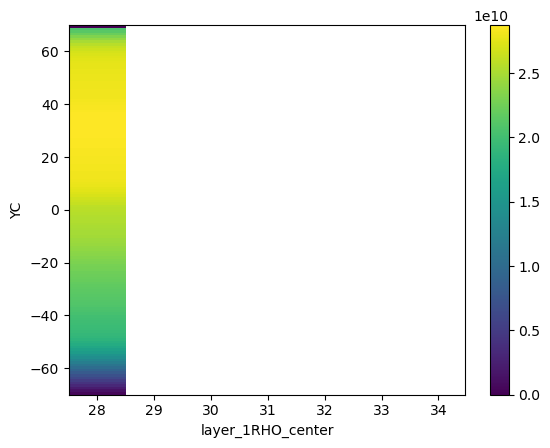

In [594]:


#grid.interp(tracer_500/zeta_500,'layer_1RHO_bounds')#.rename({'Tlev':'Zp1'}
#c=grid.interp(tracer_500,'XC')#.rename({'Tlev':'Zp1'}
#c.assign_coords(layer_1RHO_bounds=("layer_1RHO_bounds",ds50.layer_1RHO_bounds.data))
#print(c,tracer_500,ds50.layer_1RHO_bounds)



/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


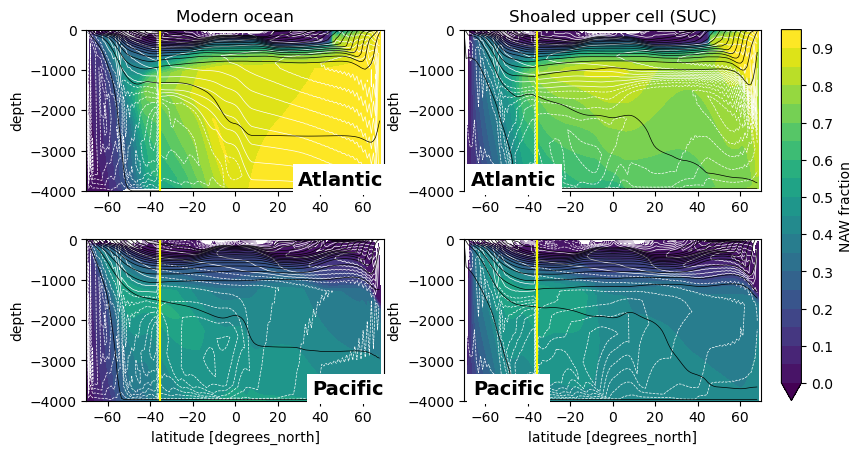

In [567]:
#Plot figure S2
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=(-9.81*(ds50.layer_1RHO_bounds-35)/1035).values[::-1]


tracer_500 = layers_apply(ds500.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(ds500.TRAC01.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')



fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Modern ocean')
ax=plt.gca()
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
b = ROC_pac1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix1
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_pac1)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))#

buoy50=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=np.insert(np.insert((-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035).values[::-1],0,0,axis=0),0,-0.01,axis=0)



tracer_500 = layers_apply(dsLGM500.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_500 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')



plt.subplot(2, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_500/zeta_500)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)

(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
plt.title('Shoaled upper cell (SUC)')
ax=plt.gca()
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
b = ROC_pac2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_pacmix2
c=(tracer_500/zeta_500)[:,:140,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_500[:,:140,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

im=c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_pac2)
layer2D=layer2D.where(layer2D.YG<69)
layer2D.plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)

plt.axvline(x=-35.5,color='yellow')
ax=plt.gca()
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_modern_LGM.pdf', bbox_inches='tight')

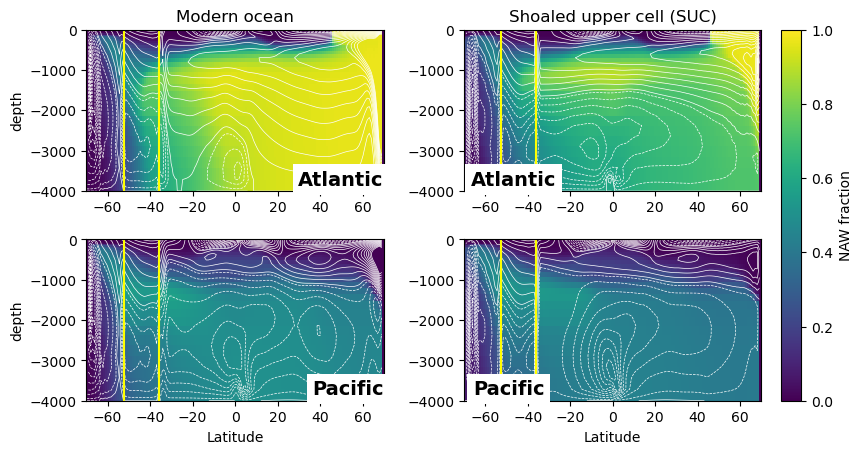

In [247]:
#Eulerian tracers (figure3)
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
TRAC1_atl=(ds500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
#p = plt.Rectangle((-30, -4000), 30, 2000, fill=False, ec='r',lw=2)
#ax.add_patch(p)
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean')
ax.text(1, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 3)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pac=(ds500.TRAC01)[0,:,:,0:140].mean('XC')
TRAC1_pac.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('Latitude')
ax.text(1, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 2)
TRAC1_atlLGM=(dsLGM500.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC)')
ax.text(0.31, 0.13, 'Atlantic', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))

plt.subplot(2, 2, 4)
Eul_pac[:,0:35]=Eul_tot[:,0:35].load()
TRAC1_pacLGM=(dsLGM500.TRAC01)[0,:,:,:140].mean('XC')
im=TRAC1_pacLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_pac_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_pac_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)

ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('Latitude')
ax.text(0.27, 0.13, 'Pacific', transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right',bbox=dict(facecolor='white', alpha=1,ec="None"))


fig.subplots_adjust(hspace=0.3, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.53])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
fig.savefig('tracers_500_depth.pdf', bbox_inches='tight')

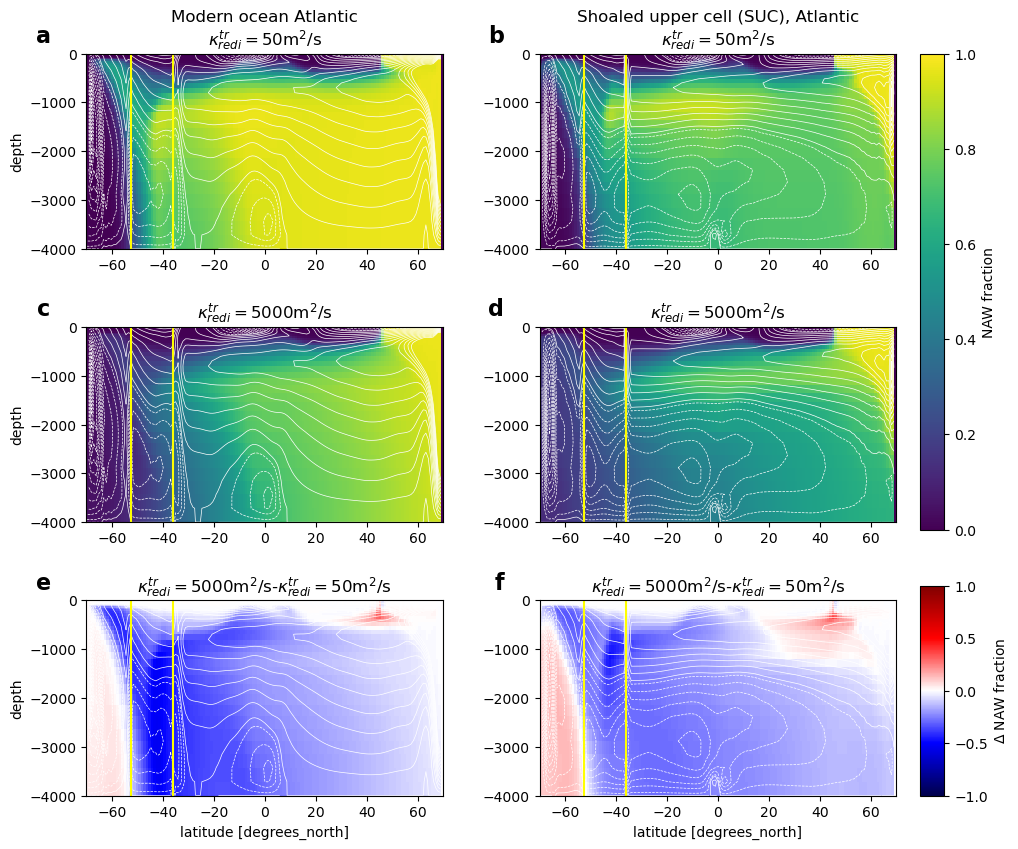

In [248]:
#Eulerian tracers (figure 7)
fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
TRAC1_atl=(ds50.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
TRAC1_atl2=(ds5000.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atl2.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax = plt.gca()
ax.set_ylabel('depth')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
(TRAC1_atl2-TRAC1_atl).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('depth')
ax.set_title('')
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 2)
TRAC1_atlLGM=(dsLGM50.TRAC01)[0,:,:,140:].mean('XC')
TRAC1_atlLGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
TRAC1_atl2LGM=(dsLGM5000.TRAC01)[0,:,:,140:].mean('XC')
im=TRAC1_atl2LGM.plot(vmin=0,vmax=1,rasterized=True,cmap='viridis',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
im2=(TRAC1_atl2LGM-TRAC1_atlLGM).plot(vmin=-1,vmax=1,rasterized=True,cmap='seismic',add_colorbar=False)
(Eul_atl_LGM/10**6).plot.contour(vmin=0,vmax=25,xlim=(-70,70),
                               ylim=(-4000,0),levels=np.arange(0,25.2,2),colors='white',linewidths=0.5)
(Eul_atl_LGM/10**6).plot.contour(vmin=-25,vmax=0,xlim=(-70,70),
                           ylim=(-4000,0),levels=np.arange(-25,0.2,2),colors='white', 
                               linestyles='dashed',linewidths=0.5)
ax = plt.gca()
ax.axvline(-36,color='yellow')
ax.axvline(-52.5,color='yellow')
ax.set_ylabel('')
ax.set_title('')
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_mixing.pdf', bbox_inches='tight')

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


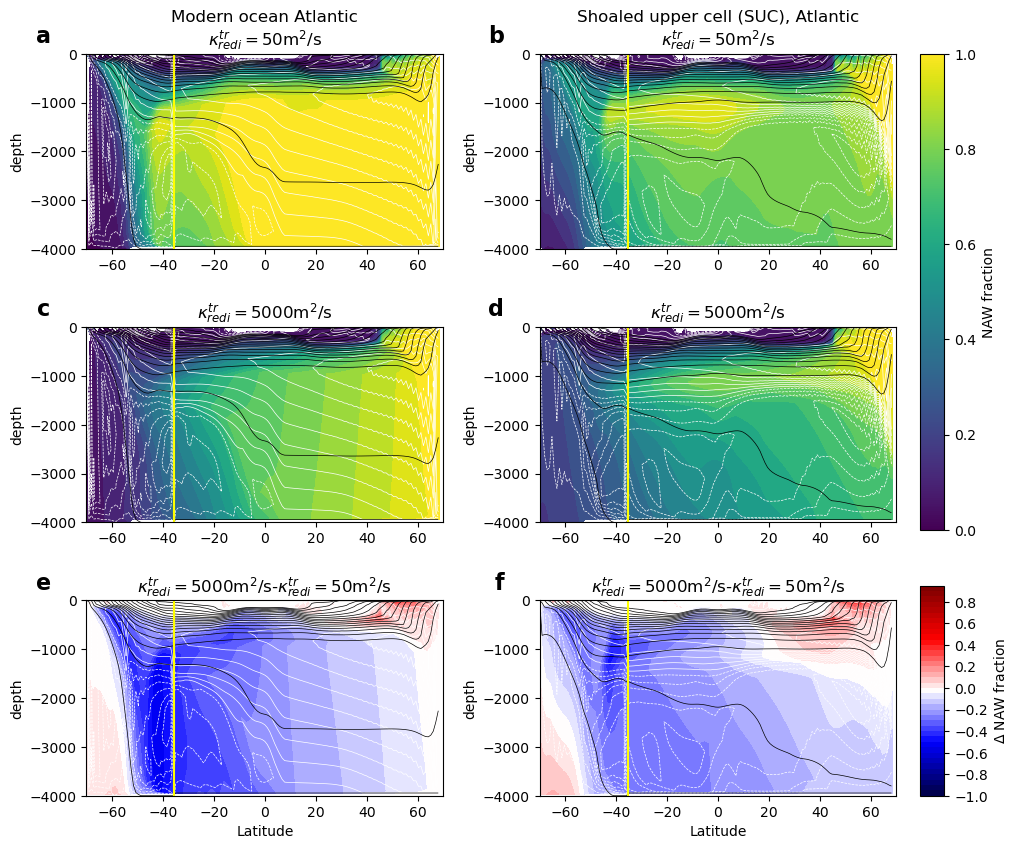

In [249]:
#Density tracers (figure S4)
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=(-9.81*(ds50.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(ds50.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(ds50.TRAC01.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(ds5000.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50

fig = plt.figure(figsize=(12,14))
plt.subplot(3, 2, 1)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.set_title(r'Modern ocean Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3, 2, 3)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 5)
b = ROC_atl1.copy()
b[:,0:35]=ROC_tot1[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix1
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(ds50.layer_1RHO_bounds-35)/1035, ds50.YG))
layer2D.coords['depth']=(-layers_depth_atl1)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('Latitude')
ax = plt.gca()
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


buoy=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035).values[::-1]

tracer_50 = layers_apply(dsLGM50.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')

tracer_5000 = layers_apply(dsLGM5000.TRAC01.mean('time'), buoy.mean('time'), baxis, dsLGM50.drF, dsLGM50.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50

plt.subplot(3, 2, 2)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_50[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_xlabel('')
ax.set_title(r'Shoaled upper cell (SUC), Atlantic' '\n' r'$\kappa_{redi}^{tr}=50$m$^2$/s')

plt.subplot(3, 2, 4)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

c.plot.contourf(x='YC',y='depth',cmap='viridis',levels=np.arange(0,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('')
ax = plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s')

plt.subplot(3, 2, 6)
b = ROC_atl2.copy()
b[:,0:35]=ROC_tot2[:,0:35].copy()
b.coords['depth']=-layers_depth_atlmix2
c=(tracer_5000/zeta_5000-tracer_50/zeta_50)[:,140:-1,:].mean('XC').transpose('Tlev','YC')
thickness=zeta_5000[:,140:-1,:].mean('XC').transpose('Tlev','YC')
c.coords['depth']=(-4000+(thickness).roll(Tlev=1,roll_coords=False).cumsum('Tlev'))

im2=c.plot.contourf(x='YC',y='depth',cmap='seismic',levels=np.arange(-1,1,0.05),add_colorbar=False)
(b[:,:-1]/10**6).plot.contour(x='YG',y='depth',xlim=(-70,70),ylim=(-4000,0),levels=np.arange(-25,25.2,2),colors='white',linewidths=0.5)
layer2D,_=(xr.broadcast(-9.81*(dsLGM50.layer_1RHO_bounds-35)/1035, dsLGM50.YG))
layer2D.coords['depth']=(-layers_depth_atl2)
layer2D[:,:-1].plot.contour(x='YG',y='depth',levels=np.arange(0,0.04,0.002),colors='black',linewidths=0.5)
plt.axvline(x=-35.5,color='yellow')
plt.xlabel('Latitude')
ax = plt.gca()
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax.set_title(r'$\kappa_{redi}^{tr}=5000$m$^2$/s-$\kappa_{redi}^{tr}=50$m$^2$/s')


fig.subplots_adjust(hspace=0.4, wspace=0.27,bottom = 0.35)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.54, 0.02, 0.34])
fig.colorbar(im, cax=cbar_ax,label='NAW fraction')
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.15])
fig.colorbar(im2, cax=cbar_ax,label='$\Delta$ NAW fraction')
fig.savefig('uniform_isopycnal_dens.pdf', bbox_inches='tight')

In [250]:
#plot map view for figure 1
nx=216
ny=144
nz=32
fname='tracers_mod_LGM/tracer_areas/tracerAAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerAPn.bin'
ds1=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerBA.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerBP.bin'
ds3=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerMAn.bin'
fname2='tracers_mod_LGM/tracer_areas/tracerMPn.bin'
ds5=np.fromfile(fname,dtype='>f') + np.fromfile(fname2,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNA.bin'
ds7=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerNP.bin'
ds8=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTA.bin'
ds9=np.fromfile(fname,dtype='>f')
fname='tracers_mod_LGM/tracer_areas/tracerTP.bin'
ds10=np.fromfile(fname,dtype='>f')
ds=ds1*0.01+ds5+ds3*0.46+ds9*0.38+ds7*0.33+ds10*0.28+ds8*0.23
ds[ds==0]=np.nan
land=np.reshape(ds,(nz,ny,nx))
land=np.transpose(land,(1,2,0))
indices=list(np.arange(140,215))+list(np.arange(0,140))+list(np.arange(140,160))
ax=plt.pcolor(np.linspace(0,210+0.97*19,235),np.linspace(-70,70,144),land[:,indices,1],cmap='tab20',rasterized=True)
#plt.colorbar(ax)
plt.plot((73,73), (-35, 70), 'k-')
plt.plot((211,211), (-52.5, 70), 'k-')
plt.plot((211,211), (-70, -65), 'k-')
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
errorboxes = []
rect = Rectangle((211,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
rect = Rectangle((0,-70), 5, 3,hatch='xxxxxx',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
plt.xlabel('longitude')
plt.ylabel('latitude')
land[10,10,1]
fig = plt.gcf()
fig.savefig('7boxes.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'tracers_mod_LGM/tracer_areas/tracerAAn.bin'

In [ ]:
kappav=np.asarray([0.0083, 0.0065, 0.0038,0.0014, 0.00039,0.000092,
           0.00003, 0.00002,0.00002,0.00002,0.00002,0.00002,
           0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,
           0.00002,0.00002,0.00002,0.00005,0.00013,0.00021,0.00022,0.00022,
           0.00022,0.00022,0.00022,0.00022])

In [ ]:
plt.plot(ds50.Z,kappav)

In [ ]:
plt.plot(ds50.Z,-np.diff(np.concatenate([np.asarray(0).reshape(1), kappav]))/ds50.drF.values)
plt.ylim(-0.000001,0.000001)

In [ ]:
ds50.drF